1. Завантаження датасету та виведення перших 5 рядків

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Завантаження датасету
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Виведення перших 5 рядків
print(df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


2. Перевірка наявності пропусків та заміна на середнє значення

In [ ]:
# Перевірка наявності пропусків
print(df.isnull().sum())

# Заповнення пропусків середнім значенням
df.fillna(df.mean(), inplace=True)


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


3. Перевірка наявності дублікатів та їх видалення

In [ ]:
# Перевірка наявності дублікатів
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

# Видалення дублікатів
df.drop_duplicates(inplace=True)


Кількість дублікатів: 0


4. Замінити бінарні ознаки та перевірка унікальних значень у стовпчику «Вік»

In [ ]:
# Перевірка унікальних значень у стовпчику «Вік»
print(df['age'].unique())

# Приклад заміни бінарних ознак (якщо такі є)
# df['binary_feature'] = df['binary_feature'].map({'yes': 1, 'no': 0})


[ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.04534098 -0.05273755 -0.00551455  0.07076875 -0.0382074
 -0.02730979 -0.04910502 -0.0854304  -0.06363517 -0.06726771 -0.10722563
 -0.02367725  0.05260606  0.06713621 -0.06000263  0.03444337  0.03081083
  0.04897352  0.01264814 -0.00914709 -0.09996055  0.01991321 -0.05637009
 -0.07816532 -0.04183994  0.05987114 -0.03457486 -0.03094232 -0.10359309
 -0.01641217  0.00175052 -0.02004471  0.0562386   0.02354575  0.0090156
 -0.07453279 -0.01277963 -0.08179786  0.08166637  0.11072668  0.09256398
  0.07440129  0.07803383  0.09619652  0.08893144]


5. Перевірка типів даних та їх заміна на числові при необхідності


In [ ]:
# Перевірка типів даних
print(df.dtypes)

# Приклад заміни типу даних на числовий
# df['feature'] = pd.to_numeric(df['feature'], errors='coerce')


age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


6. Обчислення кореляції та побудова теплової карти

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


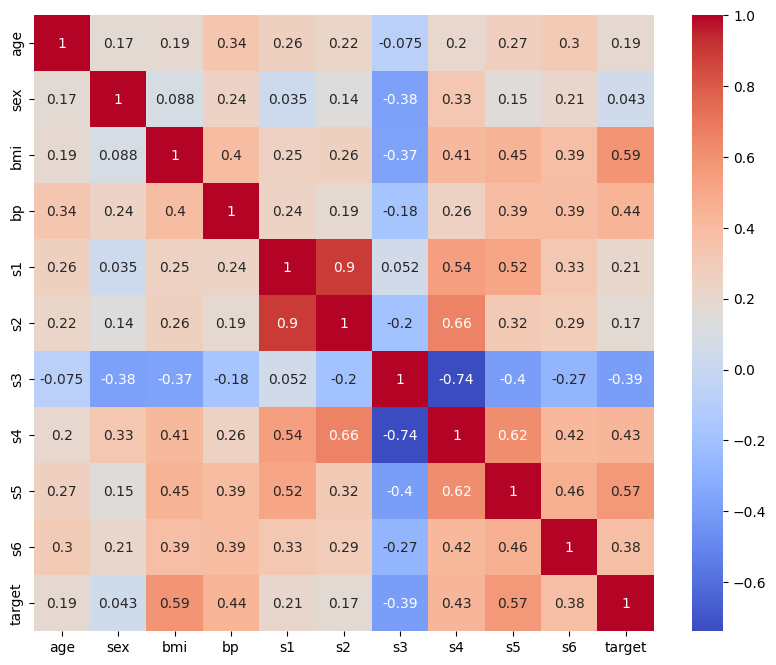

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Обчислення кореляції
correlation_matrix = df.corr()

# Виведення кореляції між прогресом діабету і іншими ознаками
print(correlation_matrix['target'].sort_values(ascending=False))

# Побудова теплової карти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


7. Масштабування ознак

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['target'] = df['target']


8. Поділ даних на тренувальну і тестову вибірки

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


9. Побудова моделей лінійної регресії та RandomForest регресії

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# RandomForest регресія
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

10. Виведення коефіцієнта детермінації та середньоквадратичної помилки

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Лінійна регресія
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# RandomForest регресія
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Лінійна регресія - MSE: {mse_lin}, R2: {r2_lin}")
print(f"RandomForest регресія - MSE: {mse_rf}, R2: {r2_rf}")


Лінійна регресія - MSE: 2900.193628493482, R2: 0.45260276297191937
RandomForest регресія - MSE: 2963.013847191012, R2: 0.44074575666493343


11. Побудова графіків

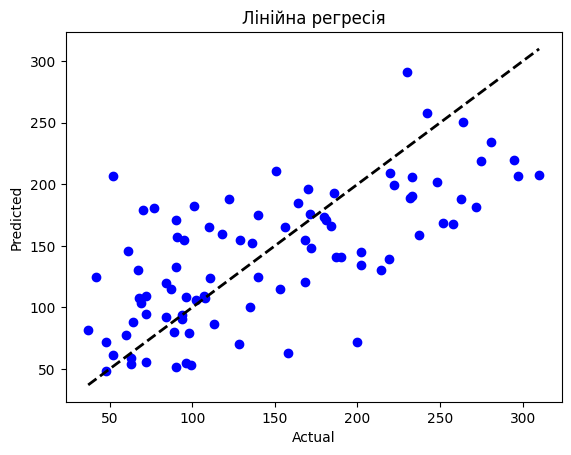

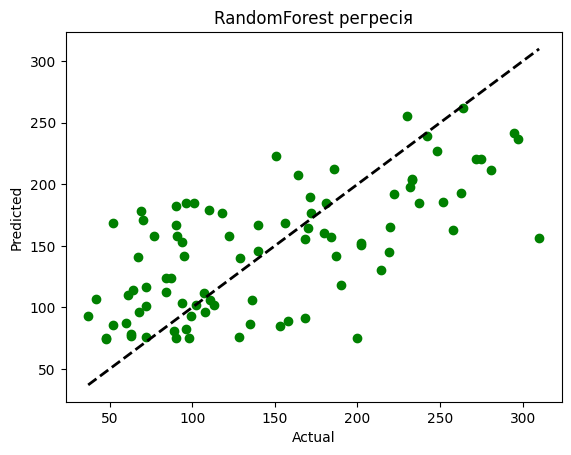

In [ ]:
# Графік для лінійної регресії
plt.scatter(y_test, y_pred_lin, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Лінійна регресія')
plt.show()

# Графік для RandomForest регресії
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest регресія')
plt.show()


12. Висновок:
На основі отриманих результатів можна зробити висновки про те, яка модель краще підходить для прогнозування прогресу діабету, а також про важливість різних ознак у цьому прогнозуванні.

Задача 2

Завантаження датасету та виведення перших 5 рядків

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Завантаження датасету
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Виведення перших 5 рядків
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


1. Проведення попереднього аналізу даних

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Кількість дублікатів: 0
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


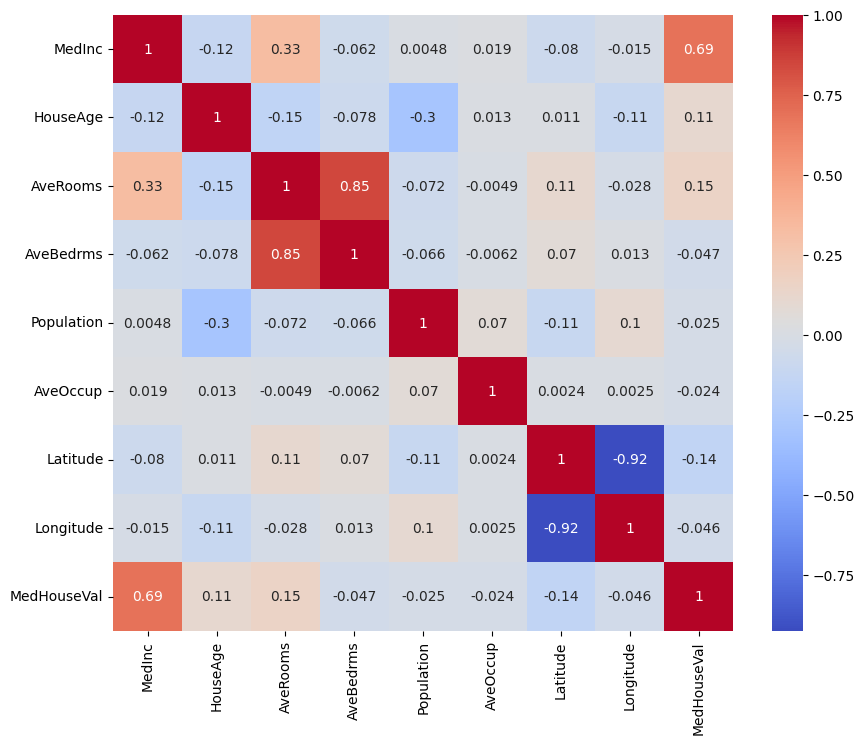

In [ ]:
# Перевірка наявності пропусків
print(df.isnull().sum())

# Заповнення пропусків середнім значенням
df.fillna(df.mean(), inplace=True)

# Перевірка наявності дублікатів
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

# Видалення дублікатів
df.drop_duplicates(inplace=True)

# Перевірка типів даних
print(df.dtypes)

# Приклад заміни типу даних на числовий (якщо необхідно)
# df['feature'] = pd.to_numeric(df['feature'], errors='coerce')

# Обчислення кореляції та побудова теплової карти
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
print(correlation_matrix['MedHouseVal'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


2. Масштабування ознак

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('MedHouseVal', axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['MedHouseVal'] = df['MedHouseVal']


3. Поділ даних на тренувальні і тестові вибірки

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('MedHouseVal', axis=1)
y = df_scaled['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Побудова моделей та підбір оптимальних параметрів за допомогою GridSearch


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# RandomForest регресія
rf_reg = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200]}
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Ridge регресія
ridge_reg = Ridge()
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_


5. Виведення R^2 та MSE, побудова графіків

Лінійна регресія - MSE: 0.5558915986952441, R2: 0.575787706032451
RandomForest регресія - MSE: 0.25401057726311893, R2: 0.8061593124887589
Ridge регресія - MSE: 0.5558875470324994, R2: 0.5757907979394906


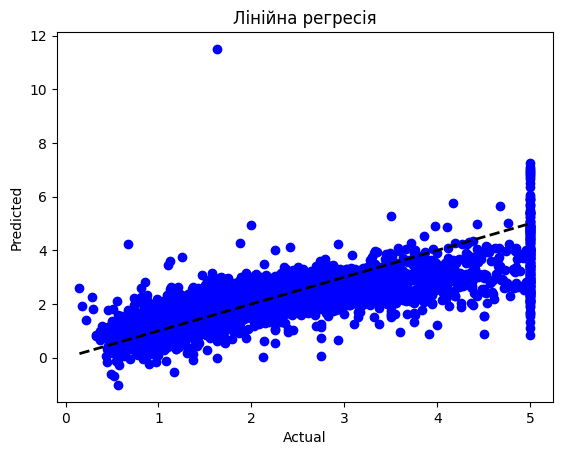

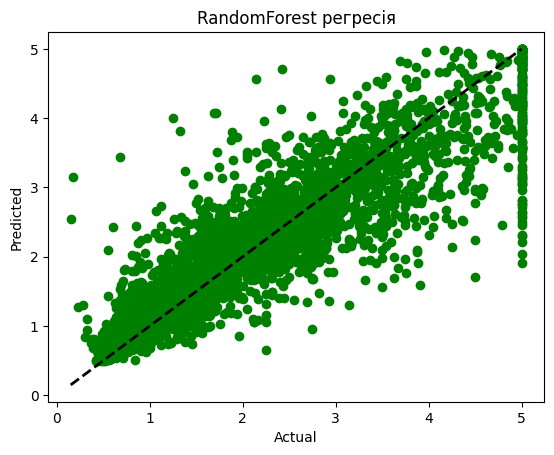

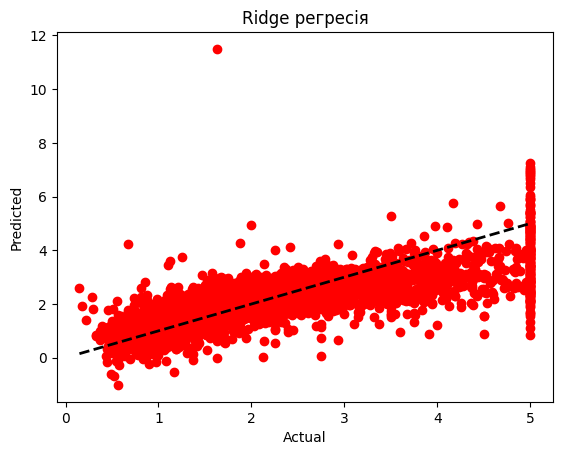

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Лінійна регресія
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# RandomForest регресія
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Ridge регресія
y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Лінійна регресія - MSE: {mse_lin}, R2: {r2_lin}")
print(f"RandomForest регресія - MSE: {mse_rf}, R2: {r2_rf}")
print(f"Ridge регресія - MSE: {mse_ridge}, R2: {r2_ridge}")

# Графіки
plt.scatter(y_test, y_pred_lin, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Лінійна регресія')
plt.show()

plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest регресія')
plt.show()

plt.scatter(y_test, y_pred_ridge, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge регресія')
plt.show()


6. Висновки:
На основі отриманих результатів можна зробити висновки про те, яка модель краще підходить для прогнозування вартості житла в Каліфорнії, а також про важливість різних ознак у цьому прогнозуванні.